# Import Library and Load Dataset

In [ ]:
# ==========================
# Standard Libraries
# ==========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import joblib
import warnings
from collections import Counter
warnings.filterwarnings("ignore", category=UserWarning)

# ==========================
# Scikit-learn Utilities
# ==========================
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve, StratifiedKFold, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, label_binarize
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# ==========================
# Machine Learning Models
# ==========================
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from lightgbm import LGBMClassifier

# ==========================
# Evaluation Metrics
# ==========================
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, mean_squared_error, r2_score, roc_auc_score

# ==========================
# Imbalanced Data Handling
# ==========================
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek


subjects = [
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT",
    "SOFTWARE CONSTRUCTION AND CONFIGURATION", "WIRELESS APPLICATION DEVELOPMENT",
    "ADVANCED WEB APPLICATION DEVELOPMENT", "SOFTWARE QUALITY ASSURANCE",
    "SOFTWARE ENTREPRENEURSHIP", "PROJECT", "MULTIMEDIA TECHNOLOGY",
    "ARTIFICIAL INTELLIGENCE", "TEAM PROJECT", "PROGRAMMING WITH GAME ENGINES",
    "ADVANCED DATABASE SYSTEMS", "CLOUD COMPUTING", "DIGITAL IMAGE PROCESSING",
    "FUNDAMENTALS OF CYBERSECURITY", "PARALLEL PROCESSING", "DATA MINING",
    "TCP/IP NETWORK ROUTING", "SERVER CONFIGURATION AND MANAGEMENT",
    "TCP/IP NETWORK APPLICATION DEVELOPMENT", "NETWORK SECURITY MANAGEMENT"
]

columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT",
    "SOFTWARE CONSTRUCTION AND CONFIGURATION", "WIRELESS APPLICATION DEVELOPMENT",
    "ADVANCED WEB APPLICATION DEVELOPMENT", "SOFTWARE QUALITY ASSURANCE",
    "SOFTWARE ENTREPRENEURSHIP", "PROJECT"]

df_dir = "/content/training-data-1000.csv"
df_real_dir = "/content/real-data.csv"

df_real = pd.read_csv(df_real_dir)
df = pd.read_csv(df_dir)

grade_map = {"A+": 8, "A": 7, "A-": 6, "B+": 5, "B": 4, "B-": 3, "C+": 2, "C": 1, "F": 0}
df_real.replace(grade_map, inplace=True)
df_real = df_real.infer_objects(copy=False)
df.replace(grade_map, inplace=True)
df = df.infer_objects(copy=False)

<ipython-input-2-da5fbad1ed7b>:82: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_real.replace(grade_map, inplace=True)
<ipython-input-2-da5fbad1ed7b>:84: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(grade_map, inplace=True)


# Advanced Web Application Development

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT",
    "ADVANCED WEB APPLICATION DEVELOPMENT"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "ADVANCED WEB APPLICATION DEVELOPMENT"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'OBJECT-ORIENTED APPLICATION DEVELOPMENT',
       'DATABASE SYSTEM FUNDAMENTALS',
       'INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE',
       'SOFTWARE DESIGN', 'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': 'balanced', 'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 100, 'num_leaves': 50}
Average CV Accuracy: 0.5185122150125874
Accuracy:  0.4983164983164983
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        46
           1       0.65      0.82      0.72        38
           2       0.66      0.53      0.58        40
           3       0.35      0.52      0.42        21
           4       0.29      0.30      0.30        33
           5       0.2

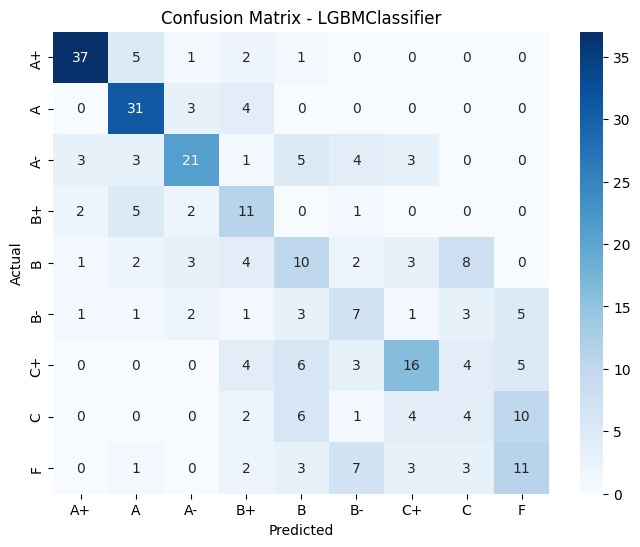

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
param_grid = {
    'n_estimators': [100, 300, 700],
    'max_depth': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print("Average CV Accuracy:", grid_search.best_score_)
print("Accuracy: ", test_accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.4958


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-awad_9.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-awad_9.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [3 8 1 4 6]


# Software Entrepreneurship

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT",
    "SOFTWARE ENTREPRENEURSHIP"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "SOFTWARE ENTREPRENEURSHIP"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week', 'SOFTWARE AND REQUIREMENTS',
       'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'DATABASE SYSTEM FUNDAMENTALS',
       'PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS',
       'COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY', 'SOFTWARE DESIGN',
       'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': 'balanced', 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 700, 'num_leaves': 50}
Average CV Accuracy: 0.6121104396255481
Accuracy:  0.6456043956043956
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.93      0.84      0.88        45
           2       0.74      0.91      0.81        43
           3       0.76      0.81      0.78        36
           4       0.62      0.62      0.62        42
           5       0.58

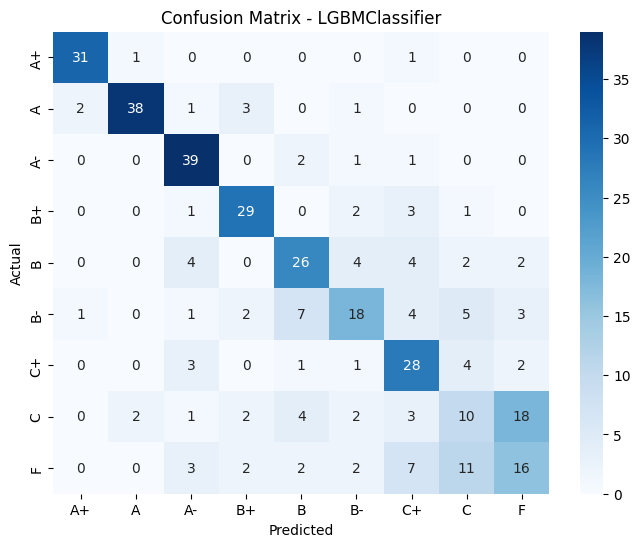

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
param_grid = {
    'n_estimators': [100, 300, 700],
    'max_depth': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print("Average CV Accuracy:", grid_search.best_score_)
print("Accuracy: ", test_accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.6368


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-se_9.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-se_9.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [6 0 5 7 8]


# Project

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT",
    "SOFTWARE CONSTRUCTION AND CONFIGURATION", "WIRELESS APPLICATION DEVELOPMENT",
    "ADVANCED WEB APPLICATION DEVELOPMENT", "SOFTWARE QUALITY ASSURANCE",
    "SOFTWARE ENTREPRENEURSHIP", "PROJECT"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "PROJECT"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'DATABASE SYSTEM FUNDAMENTALS', 'SOFTWARE PROJECT MANAGEMENT',
       'SOFTWARE CONSTRUCTION AND CONFIGURATION',
       'WIRELESS APPLICATION DEVELOPMENT',
       'ADVANCED WEB APPLICATION DEVELOPMENT', 'SOFTWARE QUALITY ASSURANCE',
       'SOFTWARE ENTREPRENEURSHIP'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(0.9606837606837607), np.int64(1): np.float64(0.9251028806584363), np.int64(2): np.float64(0.9606837606837607), np.int64(3): np.float64(0.9606837606837607), np.int64(4): np.float64(1.0321395775941231), np.int64(5): np.float64(1.0583804143126176), np.int64(6): np.float64(1.0321395775941231), np.int64(7): np.float64(1.0583804143126176), np.int64(8): np.float64(1.0321395775941231)}, 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.5355

Classification Repo

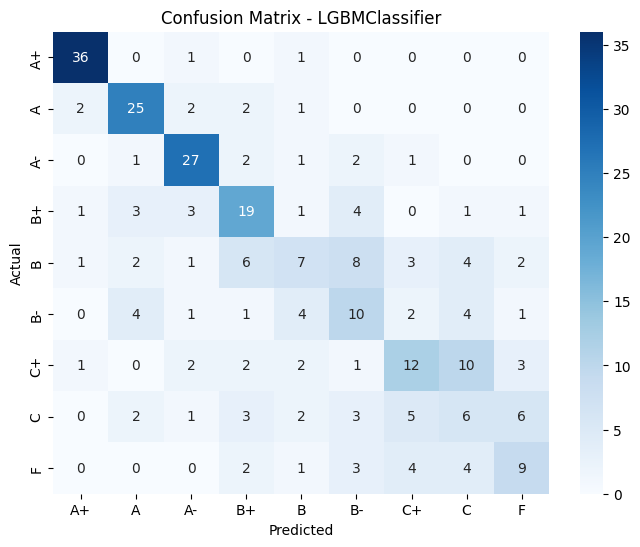

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.5236


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-project.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-project.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [1 2 6 2 3]


# Software Quality Assurance

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT",
    "SOFTWARE CONSTRUCTION AND CONFIGURATION", "WIRELESS APPLICATION DEVELOPMENT", "SOFTWARE QUALITY ASSURANCE"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "SOFTWARE QUALITY ASSURANCE"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week', 'SOFTWARE AND REQUIREMENTS',
       'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'DATABASE SYSTEM FUNDAMENTALS', 'SOFTWARE DESIGN',
       'SOFTWARE PROJECT MANAGEMENT',
       'SOFTWARE CONSTRUCTION AND CONFIGURATION',
       'WIRELESS APPLICATION DEVELOPMENT'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(0.9123123123123124), np.int64(1): np.float64(0.9481897627965044), np.int64(2): np.float64(0.9928104575163399), np.int64(3): np.float64(1.022895622895623), np.int64(4): np.float64(1.0483091787439613), np.int64(5): np.float64(1.0167336010709505), np.int64(6): np.float64(1.022895622895623), np.int64(7): np.float64(1.0750176928520878), np.int64(8): np.float64(0.9812661498708011)}, 'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.6211

Classification Report:
              prec

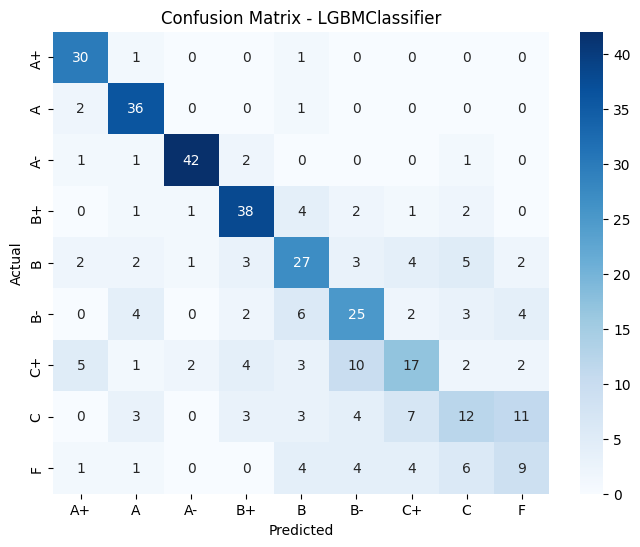

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.6080


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-sqa.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-sqa.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [1 3 5 5 1]


# Wireless Application Development

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT", "WIRELESS APPLICATION DEVELOPMENT"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "WIRELESS APPLICATION DEVELOPMENT"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'OBJECT-ORIENTED APPLICATION DEVELOPMENT',
       'DATABASE SYSTEM FUNDAMENTALS',
       'INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE',
       'WEB APPLICATION DEVELOPMENT', 'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': 'balanced', 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.5593

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        34
           1       0.76      0.81      0.79        43
           2       0.64      0.85      0.73        34
           3       0.50      0.57      0.53        30
           4       0.63      0.45      0.52        38
           5       0.21      0.21      0.21   

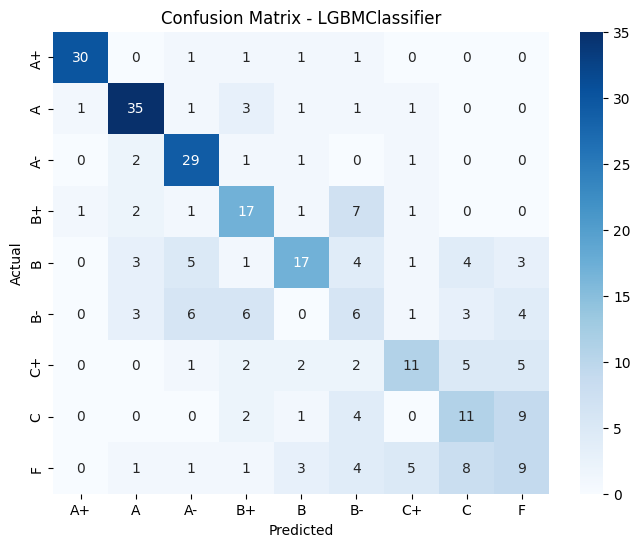

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.5546


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-wireless.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-wireless.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [4 5 2 3 7]


# Software Construction and Configuration

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT", "SOFTWARE CONSTRUCTION AND CONFIGURATION"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "SOFTWARE CONSTRUCTION AND CONFIGURATION"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'SOFTWARE AND REQUIREMENTS',
       'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'DATABASE SYSTEM FUNDAMENTALS',
       'INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE',
       'SOFTWARE DESIGN', 'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': 'balanced', 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.6019

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.84      0.86      0.85        42
           2       0.70      0.88      0.78        40
           3       0.64      0.68      0.66        37
           4       0.55      0.45      0.49        38
           5       0.40      0.39      0.39        31
           6      

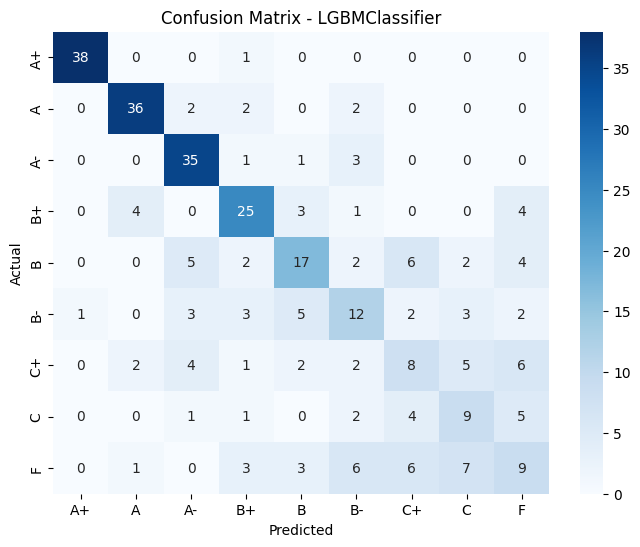

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.5938


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-scc.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-scc.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [4 0 4 0 1]


# Software Project Management

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "SOFTWARE PROJECT MANAGEMENT"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'SOFTWARE AND REQUIREMENTS',
       'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'DATABASE SYSTEM FUNDAMENTALS',
       'INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE',
       'COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY', 'SOFTWARE DESIGN'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(0.9201787994891443), np.int64(1): np.float64(0.953042328042328), np.int64(2): np.float64(0.9703703703703703), np.int64(3): np.float64(1.0133614627285514), np.int64(4): np.float64(0.9703703703703703), np.int64(5): np.float64(1.0263532763532763), np.int64(6): np.float64(1.0263532763532763), np.int64(7): np.float64(1.1355397951142632), np.int64(8): np.float64(1.0133614627285514)}, 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.6094

Classi

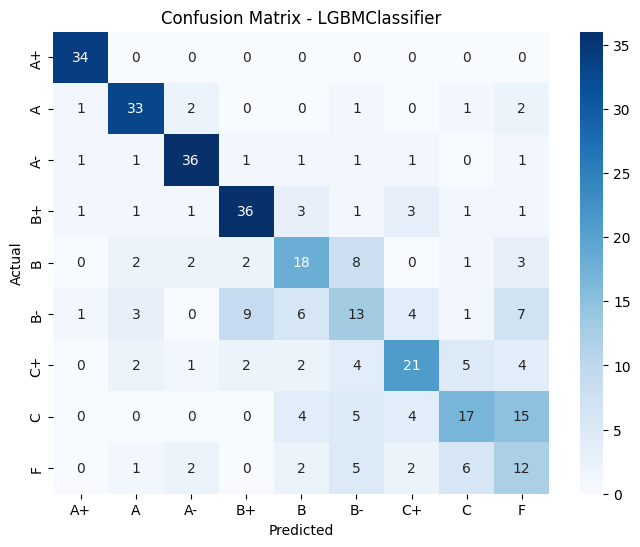

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.6062


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-spm.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-spm.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [7 8 0 2 1]


# Software Testing

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "SOFTWARE TESTING"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "SOFTWARE TESTING"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'OBJECT-ORIENTED APPLICATION DEVELOPMENT',
       'DATABASE SYSTEM FUNDAMENTALS',
       'INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE',
       'PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS',
       'COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(0.9616469261139312), np.int64(1): np.float64(0.9765177548682703), np.int64(2): np.float64(0.9815774323546345), np.int64(3): np.float64(1.0466543891958258), np.int64(4): np.float64(0.9567901234567902), np.int64(5): np.float64(0.9765177548682703), np.int64(6): np.float64(1.040903540903541), np.int64(7): np.float64(1.0763888888888888), np.int64(8): np.float64(0.9970760233918129)}, 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100, '

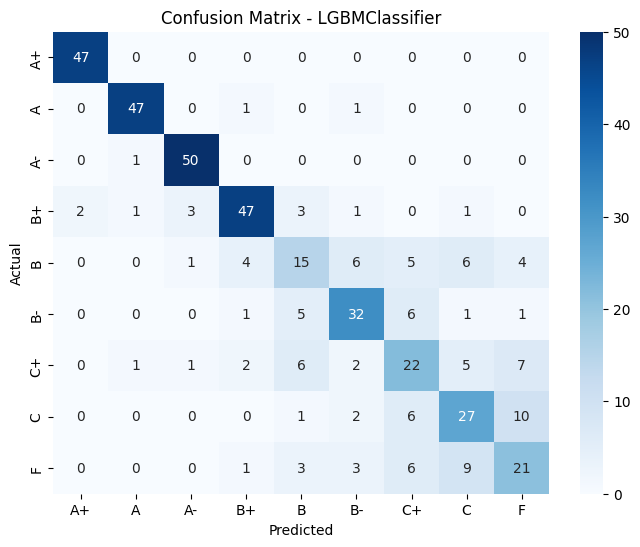

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.7170


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-testing.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-testing.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [8 6 4 4 6]


# Software Design

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "SOFTWARE DESIGN"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "SOFTWARE DESIGN"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'SOFTWARE AND REQUIREMENTS',
       'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'DATABASE SYSTEM FUNDAMENTALS',
       'INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE',
       'PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS',
       'COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(0.9613259668508287), np.int64(1): np.float64(0.9560439560439561), np.int64(2): np.float64(1.0674846625766872), np.int64(3): np.float64(0.9830508474576272), np.int64(4): np.float64(0.9942857142857143), np.int64(5): np.float64(1.0), np.int64(6): np.float64(0.9775280898876404), np.int64(7): np.float64(1.0235294117647058), np.int64(8): np.float64(1.0481927710843373)}, 'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 100, 'num_leaves': 100}

LightGBM 

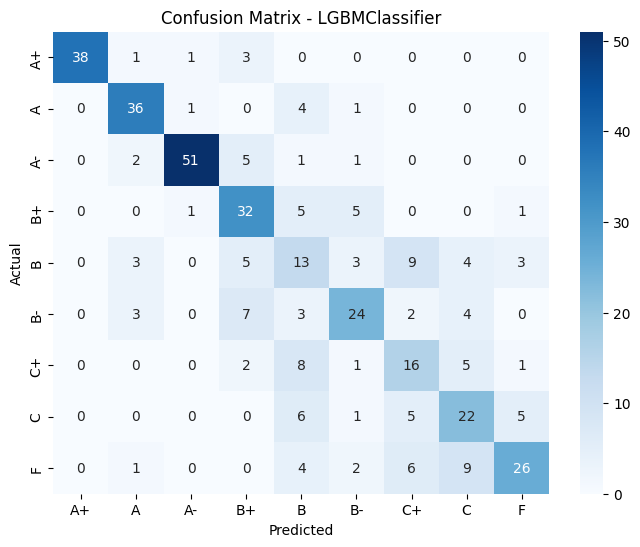

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.6639


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-design.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-design.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [0 7 7 6 2]


# Web Application Development

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "WEB APPLICATION DEVELOPMENT"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'SOFTWARE AND REQUIREMENTS',
       'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'DATABASE SYSTEM FUNDAMENTALS',
       'INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE',
       'PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS',
       'COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(0.9438405797101449), np.int64(1): np.float64(0.9542124542124543), np.int64(2): np.float64(0.9980842911877394), np.int64(3): np.float64(0.9811676082862524), np.int64(4): np.float64(0.9811676082862524), np.int64(5): np.float64(1.0461847389558232), np.int64(6): np.float64(1.0096899224806202), np.int64(7): np.float64(1.0589430894308942), np.int64(8): np.float64(1.0399201596806387)}, 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 

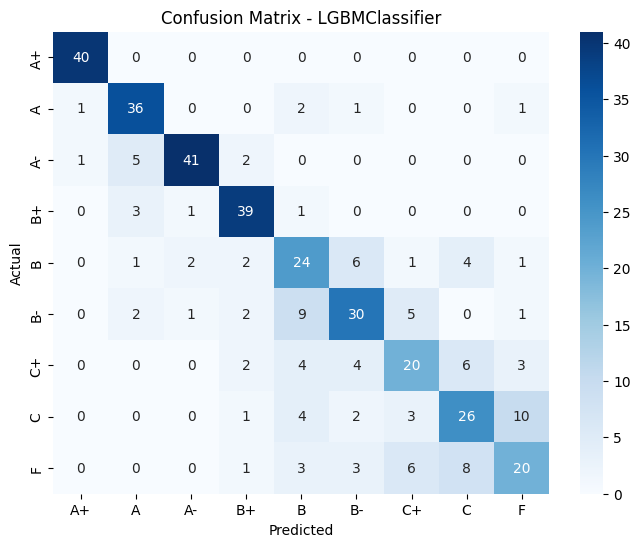

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.7028


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-wad.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-wad.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [3 5 0 0 8]


# Computer Ethics and Professional Responsibility

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(smote=SMOTE(k_neighbors=2), random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'DATABASE SYSTEM FUNDAMENTALS', 'WEB APPLICATION DEVELOPMENT',
       'SOFTWARE DESIGN', 'SOFTWARE TESTING', 'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(1.0016339869281046), np.int64(1): np.float64(1.0165837479270314), np.int64(2): np.float64(0.9871175523349437), np.int64(3): np.float64(0.942714340638216), np.int64(4): np.float64(1.031986531986532), np.int64(5): np.float64(1.0203911776945485), np.int64(6): np.float64(0.9871175523349437), np.int64(7): np.float64(1.0242272347535506), np.int64(8): np.float64(0.9943227899432279)}, 'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.8176

Classification Report:
              precision    recall  f1-score   support


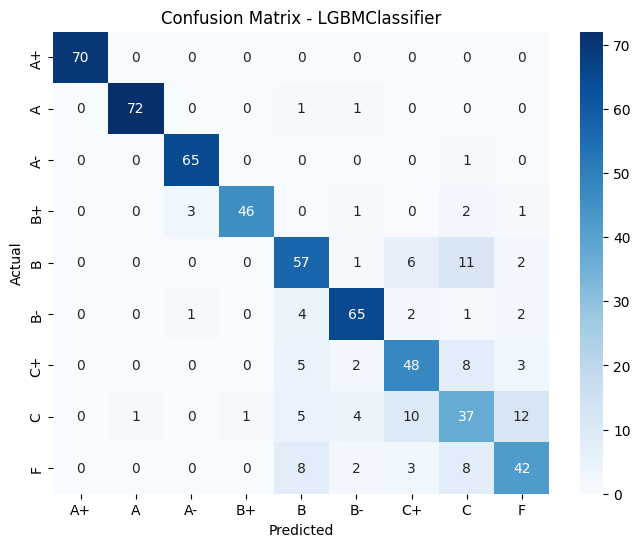

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.8177


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-ethics.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-ethics.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [0 7 0 1 1]


# Problem Solving with Data Structures and Algorithms

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'DATABASE SYSTEM FUNDAMENTALS',
       'INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE',
       'OPERATING SYSTEMS', 'WEB APPLICATION DEVELOPMENT',
       'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': 'balanced', 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.7773

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.92      0.92      0.92        63
           2       0.87      1.00      0.93        54
           3       0.93      0.80      0.86        49
           4       0.62      0.61      0.61        66
           5       0.65      0.75      0.69        44
           6  

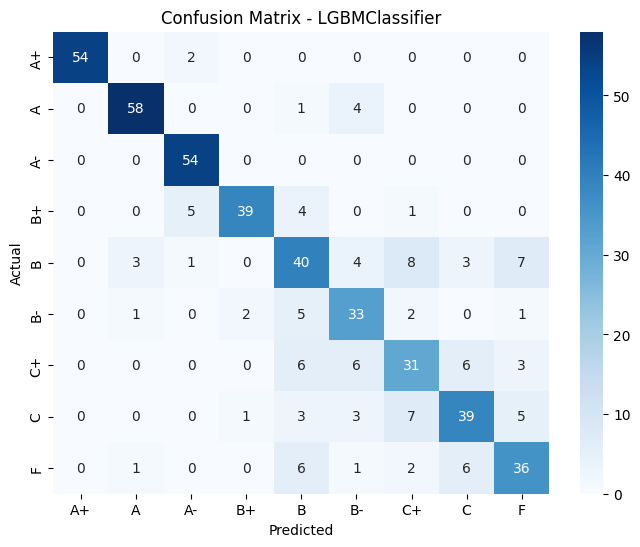

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.7770


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-algo.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-algo.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [5 2 2 3 1]


# Operating Systems

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "OPERATING SYSTEMS"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(smote=SMOTE(k_neighbors=2), random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'DATABASE SYSTEM FUNDAMENTALS',
       'INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE',
       'HUMAN COMPUTER INTERACTION DESIGN',
       'PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS',
       'SOFTWARE DESIGN', 'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(0.9858724704085529), np.int64(1): np.float64(1.003108003108003), np.int64(2): np.float64(0.9692192192192193), np.int64(3): np.float64(0.9725047080979284), np.int64(4): np.float64(1.003108003108003), np.int64(5): np.float64(1.010172143974961), np.int64(6): np.float64(1.0547385620915033), np.int64(7): np.float64(1.0209568999604586), np.int64(8): np.float64(0.9858724704085529)}, 'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0

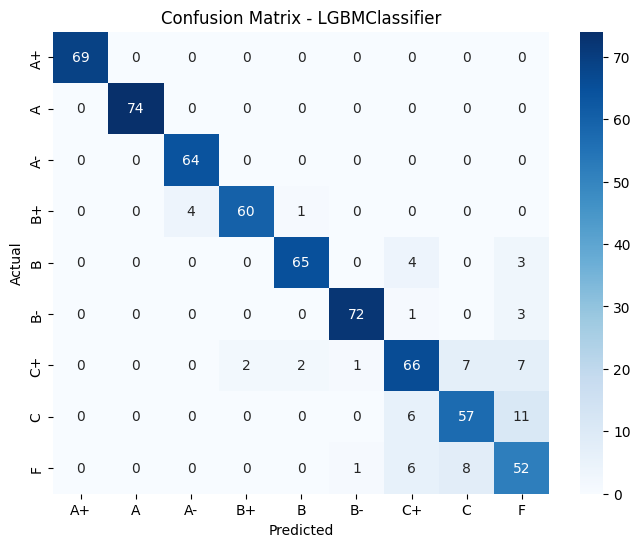

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.8972


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-os.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-os.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [5 3 6 8 1]


# Human Computer Interaction Design

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "HUMAN COMPUTER INTERACTION DESIGN"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(smote=SMOTE(k_neighbors=2), random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week', 'SOFTWARE AND REQUIREMENTS',
       'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'DATABASE SYSTEM FUNDAMENTALS',
       'INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE',
       'OPERATING SYSTEMS', 'SOFTWARE DESIGN', 'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': 'balanced', 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.8714

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        65
           1       0.99      0.98      0.98        87
           2       1.00      1.00      1.00        72
           3       0.89      0.86      0.87        72
           4       0.84      0.79      0.81        85
           5       0.86      0.91      0.88        65
           6       0.77      0.77      

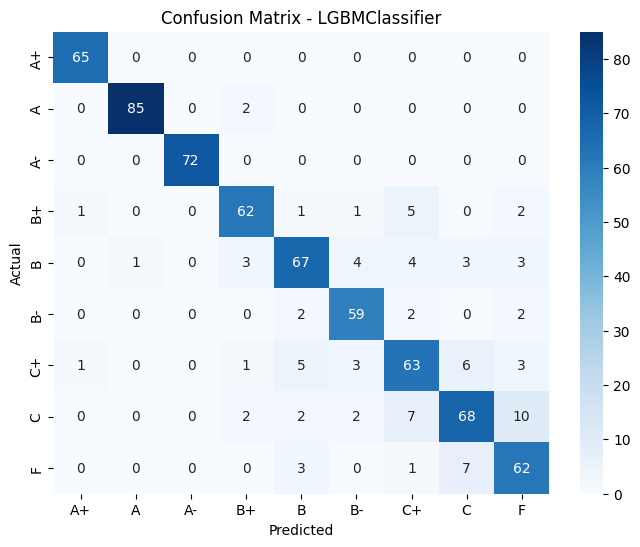

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.8711


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-hcid.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-hcid.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [7 1 4 3 4]


# Introduction to Computer Organisation and Architecture

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'SOFTWARE AND REQUIREMENTS',
       'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'OBJECT-ORIENTED APPLICATION DEVELOPMENT',
       'DATABASE SYSTEM FUNDAMENTALS', 'HUMAN COMPUTER INTERACTION DESIGN',
       'PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(0.9617044228694714), np.int64(1): np.float64(0.9856274184632393), np.int64(2): np.float64(0.9905555555555555), np.int64(3): np.float64(0.9856274184632393), np.int64(4): np.float64(0.9807480748074807), np.int64(5): np.float64(0.9905555555555555), np.int64(6): np.float64(1.0372309482257127), np.int64(7): np.float64(1.0211912943871706), np.int64(8): np.float64(1.0537825059101655)}, 'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.7556

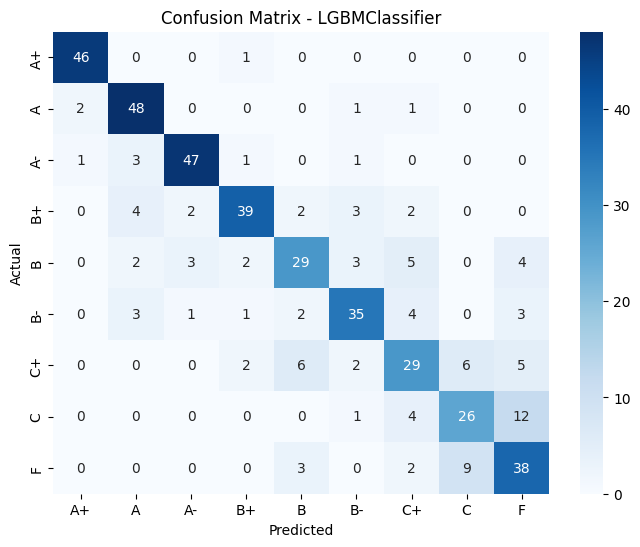

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.7539


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-coa.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-coa.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [7 5 3 7 2]


# Database System Fundamentals

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "DATABASE SYSTEM FUNDAMENTALS"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'SOFTWARE AND REQUIREMENTS',
       'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'OBJECT-ORIENTED APPLICATION DEVELOPMENT',
       'COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY'],
      dtype='object')
Best Parameters: {'class_weight': 'balanced', 'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.5814

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.84        43
           1       0.54      0.61      0.57        36
           2       0.68      0.86      0.76        35
           3       0.58      0.47      0.52        32
           4       0.09      0.06      0.07        31
           5       0.32      0.20      0.24        30
           6       0.47      0.48      0.48        33
           7     

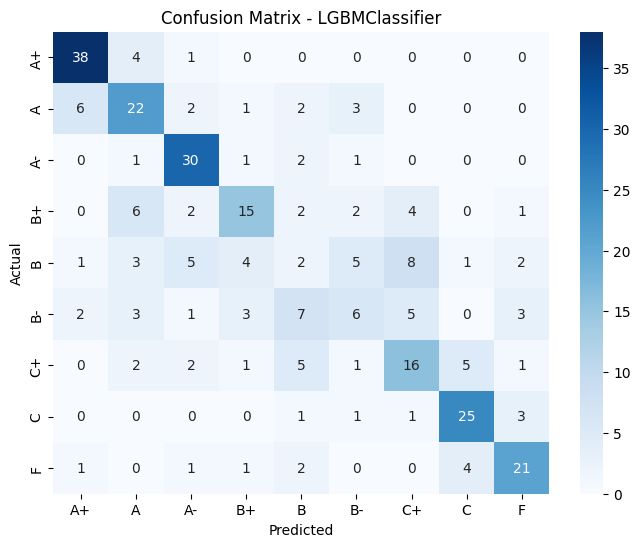

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.5620


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-database.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-database.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [2 0 6 1 8]


# Object-Oriented Application Development

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "OBJECT-ORIENTED APPLICATION DEVELOPMENT"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'SOFTWARE AND REQUIREMENTS',
       'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'DATABASE SYSTEM FUNDAMENTALS'],
      dtype='object')
Best Parameters: {'class_weight': 'balanced', 'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.5253

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.86        23
           1       0.76      0.55      0.64        40
           2       0.76      0.84      0.80        31
           3       0.35      0.46      0.40        24
           4       0.21      0.22      0.21        23
           5       0.39      0.22      0.28        32
           6       0.44      0.43      0.44        28
           7       0.45      0.63      0.52        27
           8       0.46      0.4

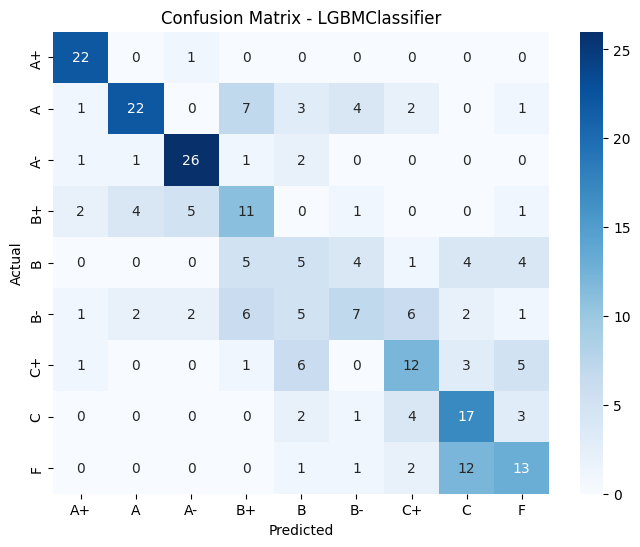

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.5182


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-ooad.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-ooad.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [6 7 7 1 5]


# Probability and Statistics for Computing

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "PROBABILITY AND STATISTICS FOR COMPUTING"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'SOFTWARE AND REQUIREMENTS',
       'TCP/IP NETWORK FUNDAMENTALS',
       'OBJECT-ORIENTED APPLICATION DEVELOPMENT',
       'DATABASE SYSTEM FUNDAMENTALS'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(0.8719135802469136), np.int64(1): np.float64(0.9809027777777778), np.int64(2): np.float64(0.9511784511784511), np.int64(3): np.float64(0.9658119658119658), np.int64(4): np.float64(1.1518858307849134), np.int64(5): np.float64(1.029143897996357), np.int64(6): np.float64(1.1111111111111112), np.int64(7): np.float64(0.9964726631393298), np.int64(8): np.float64(0.9964726631393298)}, 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.5724

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        31
           1     

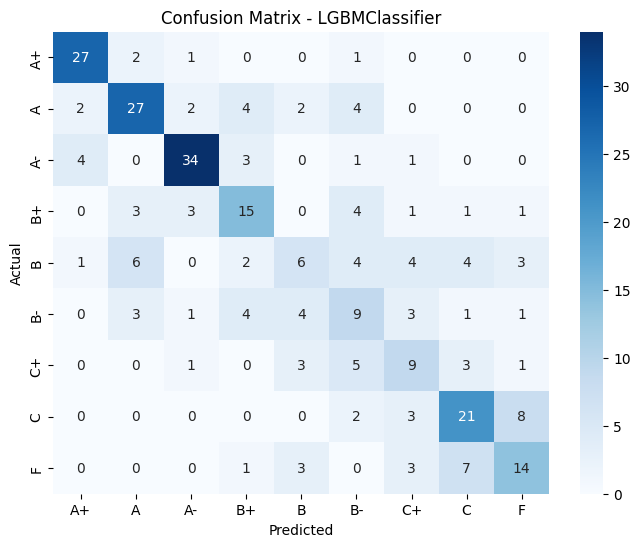

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.5670


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-prob.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-prob.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [3 0 1 5 1]


# TCP/IP Network Fundamentals

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "TCP/IP NETWORK FUNDAMENTALS"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'SOFTWARE AND REQUIREMENTS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'OBJECT-ORIENTED APPLICATION DEVELOPMENT',
       'DATABASE SYSTEM FUNDAMENTALS'],
      dtype='object')
Best Parameters: {'class_weight': 'balanced', 'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.5599

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        39
           1       0.62      0.67      0.65        30
           2       0.66      0.57      0.61        37
           3       0.45      0.48      0.47        31
           4       0.46      0.34      0.39        32
           5       0.29      0.42      0.34        19
           6       0.44      0.57      0.50        28
           7       0.71      0.49      0.58        35
           8       0

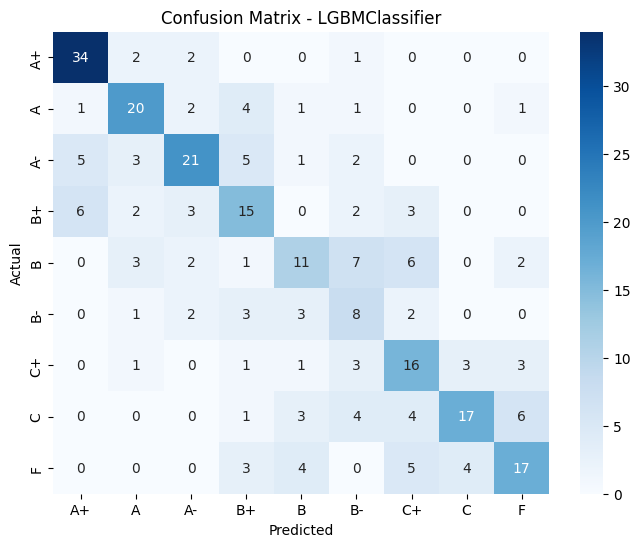

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.5596


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-tcpip-fundamentals.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-tcpip-fundamentals.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [7 4 5 8 8]


# Software and Requirements

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "SOFTWARE AND REQUIREMENTS"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'OBJECT-ORIENTED APPLICATION DEVELOPMENT',
       'DATABASE SYSTEM FUNDAMENTALS'],
      dtype='object')
Best Parameters: {'class_weight': 'balanced', 'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.6676

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        40
           1       0.74      0.82      0.78        34
           2       0.90      0.96      0.93        47
           3       0.72      0.66      0.69        44
           4       0.51      0.55      0.53        40
           5       0.56      0.57      0.57        40
           6       0.54      0.55      0.55        38
           7       0.53      0.55      0.54        33
           8      

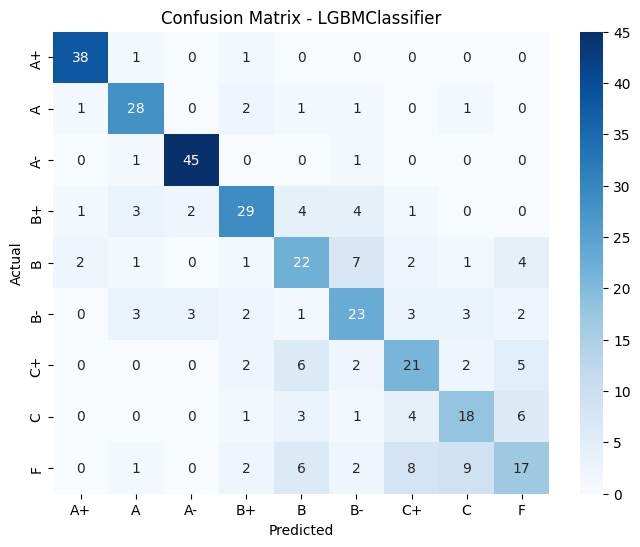

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.6628


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-requirements.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-requirements.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [6 8 0 3 2]


# Programming and Problem Solving

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "PROGRAMMING AND PROBLEM SOLVING"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week', 'SOFTWARE AND REQUIREMENTS',
       'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'OBJECT-ORIENTED APPLICATION DEVELOPMENT',
       'DATABASE SYSTEM FUNDAMENTALS'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(0.8660130718954249), np.int64(1): np.float64(0.9273840769903762), np.int64(2): np.float64(0.8660130718954249), np.int64(3): np.float64(0.9273840769903762), np.int64(4): np.float64(1.1324786324786325), np.int64(5): np.float64(1.0153256704980842), np.int64(6): np.float64(1.1896745230078563), np.int64(7): np.float64(1.1216931216931216), np.int64(8): np.float64(1.0707070707070707)}, 'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.5677

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        36
       

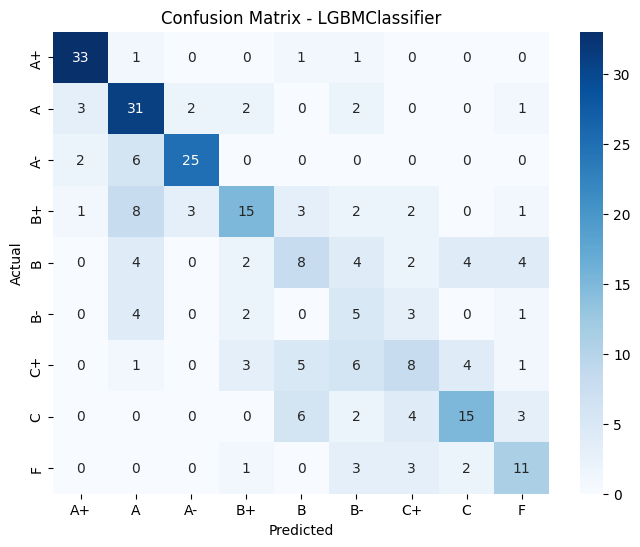

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.5646


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-programming.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-programming.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [0 8 0 4 8]


# Multimedia Technology

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT", "MULTIMEDIA TECHNOLOGY"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "MULTIMEDIA TECHNOLOGY"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'SOFTWARE AND REQUIREMENTS',
       'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'DATABASE SYSTEM FUNDAMENTALS',
       'INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE',
       'SOFTWARE DESIGN', 'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(0.9491869918699187), np.int64(1): np.float64(0.9915074309978769), np.int64(2): np.float64(0.9265873015873016), np.int64(3): np.float64(0.9550102249488752), np.int64(4): np.float64(0.9491869918699187), np.int64(5): np.float64(1.0589569160997732), np.int64(6): np.float64(1.0589569160997732), np.int64(7): np.float64(1.0735632183908046), np.int64(8): np.float64(1.0662100456621004)}, 'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.5897

Classification Report:
  

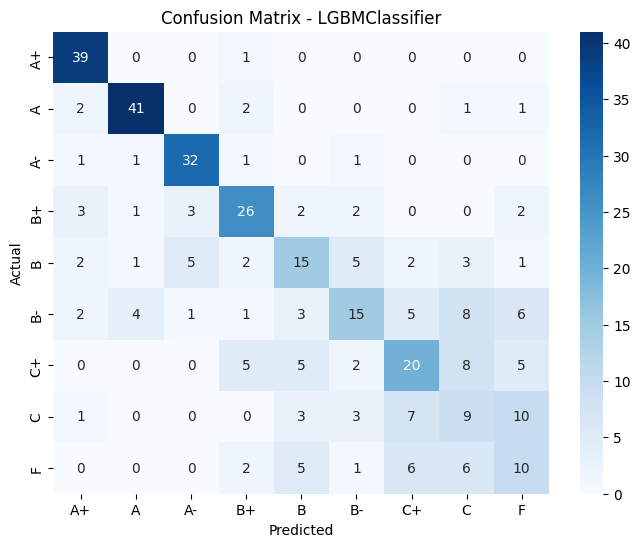

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.5808


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-multimedia_9.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-multimedia_9.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [5 3 5 3 3]


# Artificial Intelligence

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT", "ARTIFICIAL INTELLIGENCE"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "ARTIFICIAL INTELLIGENCE"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'SOFTWARE AND REQUIREMENTS',
       'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'DATABASE SYSTEM FUNDAMENTALS',
       'PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS',
       'SOFTWARE DESIGN', 'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(0.987391646966115), np.int64(1): np.float64(0.9406906906906907), np.int64(2): np.float64(1.0015987210231814), np.int64(3): np.float64(0.9601532567049809), np.int64(4): np.float64(0.9735819735819736), np.int64(5): np.float64(0.966820987654321), np.int64(6): np.float64(1.0792420327304049), np.int64(7): np.float64(1.0792420327304049), np.int64(8): np.float64(1.031275720164609)}, 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.5828

Classification Report:
        

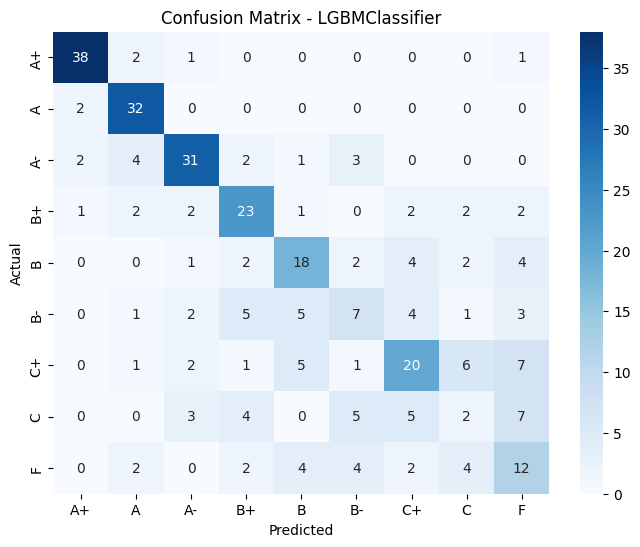

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.5700


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-ai_9.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-ai_9.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [8 1 8 6 2]


# Team Project

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT", "TEAM PROJECT"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "TEAM PROJECT"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'DATABASE SYSTEM FUNDAMENTALS',
       'INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE',
       'WEB APPLICATION DEVELOPMENT', 'SOFTWARE DESIGN',
       'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(0.9330289193302892), np.int64(1): np.float64(1.0165837479270314), np.int64(2): np.float64(0.939463601532567), np.int64(3): np.float64(0.939463601532567), np.int64(4): np.float64(0.973015873015873), np.int64(5): np.float64(1.125803489439853), np.int64(6): np.float64(0.973015873015873), np.int64(7): np.float64(1.0559862187769165), np.int64(8): np.float64(1.0811287477954146)}, 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.5212

Classification Report:
     

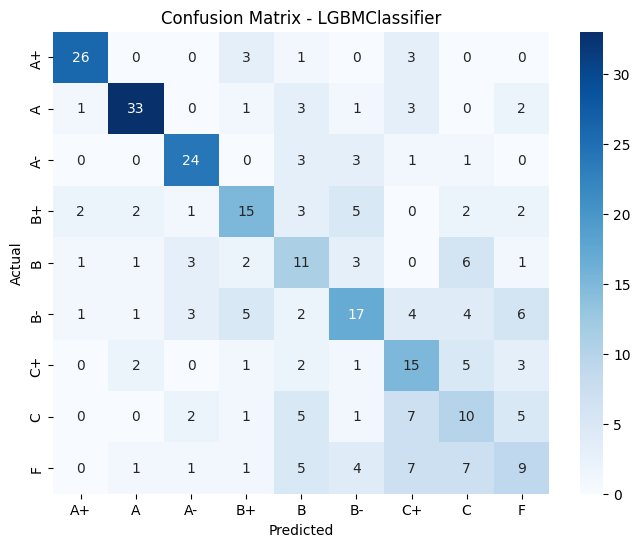

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.5242


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-team-project_9.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-team-project_9.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [2 6 5 4 8]


# Programming with Game Engines

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT", "PROGRAMMING WITH GAME ENGINES"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "PROGRAMMING WITH GAME ENGINES"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'SOFTWARE AND REQUIREMENTS',
       'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'DATABASE SYSTEM FUNDAMENTALS',
       'PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS',
       'SOFTWARE DESIGN', 'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(0.9701492537313433), np.int64(1): np.float64(0.9848484848484849), np.int64(2): np.float64(0.9701492537313433), np.int64(3): np.float64(0.948905109489051), np.int64(4): np.float64(1.0077519379844961), np.int64(5): np.float64(1.0236220472440944), np.int64(6): np.float64(0.9774436090225563), np.int64(7): np.float64(1.1016949152542372), np.int64(8): np.float64(1.0317460317460319)}, 'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.5290

Classification Report:
      

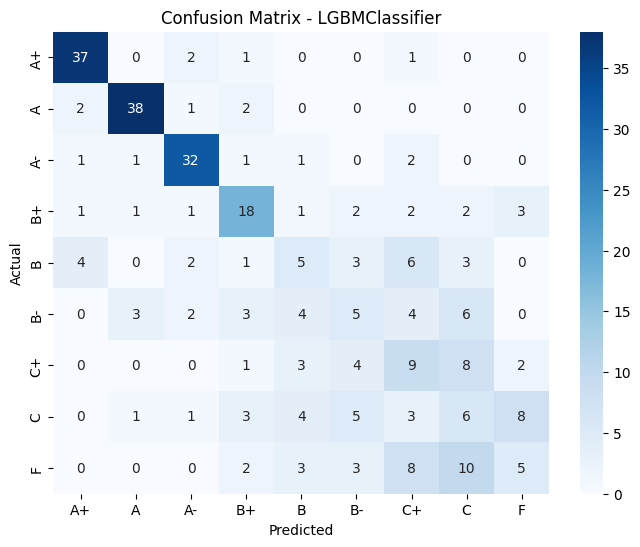

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.5187


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-game-engines_9.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-game-engines_9.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [2 7 7 4 2]


# Advanced Database Systems

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT", "ADVANCED DATABASE SYSTEMS"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "ADVANCED DATABASE SYSTEMS"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'OBJECT-ORIENTED APPLICATION DEVELOPMENT',
       'DATABASE SYSTEM FUNDAMENTALS',
       'INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE',
       'SOFTWARE DESIGN', 'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(0.9179487179487179), np.int64(1): np.float64(0.910941475826972), np.int64(2): np.float64(0.9546666666666667), np.int64(3): np.float64(0.9623655913978495), np.int64(4): np.float64(1.0112994350282485), np.int64(5): np.float64(0.9701897018970189), np.int64(6): np.float64(1.115264797507788), np.int64(7): np.float64(1.115264797507788), np.int64(8): np.float64(1.0948012232415902)}, 'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.4684

Classification

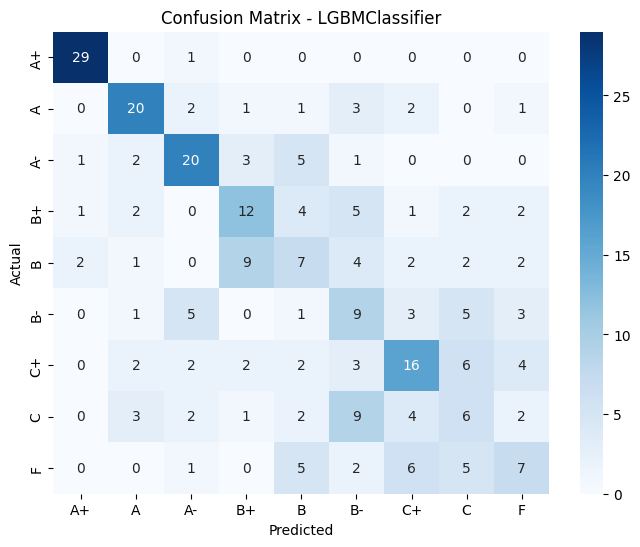

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.4643


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-advanced-database_9.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-advanced-database_9.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [7 7 3 8 0]


# Cloud Computing

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT", "CLOUD COMPUTING"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "CLOUD COMPUTING"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'SOFTWARE AND REQUIREMENTS',
       'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'DATABASE SYSTEM FUNDAMENTALS', 'WEB APPLICATION DEVELOPMENT',
       'SOFTWARE DESIGN', 'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': 'balanced', 'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.4789

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        30
           1       0.67      0.69      0.68        32
           2       0.73      0.73      0.73        26
           3       0.52      0.48      0.50        29
           4       0.27      0.21      0.24        29
           5       0.12      0.28      0.17        18
           6       0.42      0.47      0.44        3

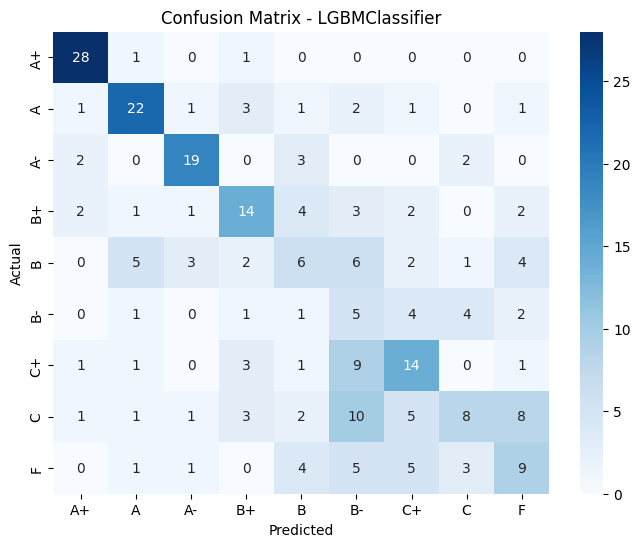

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.4765


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-cloud-computing_9.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-cloud-computing_9.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [2 0 7 0 2]


# Digital Image Processing

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT", "DIGITAL IMAGE PROCESSING"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "DIGITAL IMAGE PROCESSING"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'SOFTWARE AND REQUIREMENTS',
       'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'OBJECT-ORIENTED APPLICATION DEVELOPMENT',
       'DATABASE SYSTEM FUNDAMENTALS', 'WEB APPLICATION DEVELOPMENT',
       'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': 'balanced', 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.5413

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        42
           1       0.77      0.62      0.69        39
           2       0.67      0.78      0.72        37
           3       0.61      0.61      0.61        36
           4       0.44      0.35      0.39        34
           5       0.32      0.29      0.30        28
           6       0.

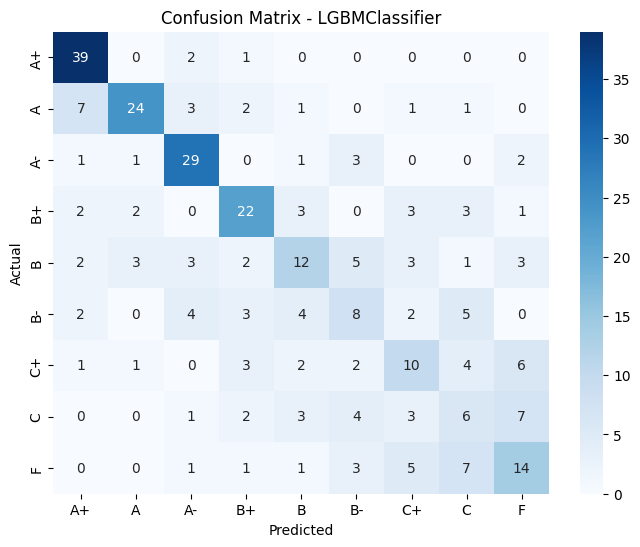

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.5332


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-dip_9.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-dip_9.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [2 7 3 2 8]


# Fundamentals of Cybersecurity

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT", "FUNDAMENTALS OF CYBERSECURITY"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "FUNDAMENTALS OF CYBERSECURITY"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'SOFTWARE AND REQUIREMENTS',
       'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'OBJECT-ORIENTED APPLICATION DEVELOPMENT',
       'DATABASE SYSTEM FUNDAMENTALS',
       'PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS',
       'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(0.9468186134852802), np.int64(1): np.float64(0.9549808429118773), np.int64(2): np.float64(0.8654513888888888), np.int64(3): np.float64(0.9080145719489982), np.int64(4): np.float64(0.9890873015873016), np.int64(5): np.float64(1.0257201646090535), np.int64(6): np.float64(1.1660818713450292), np.int64(7): np.float64(1.0968096809680967), np.int64(8): np.float64(1.1303854875283448)}, 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.468

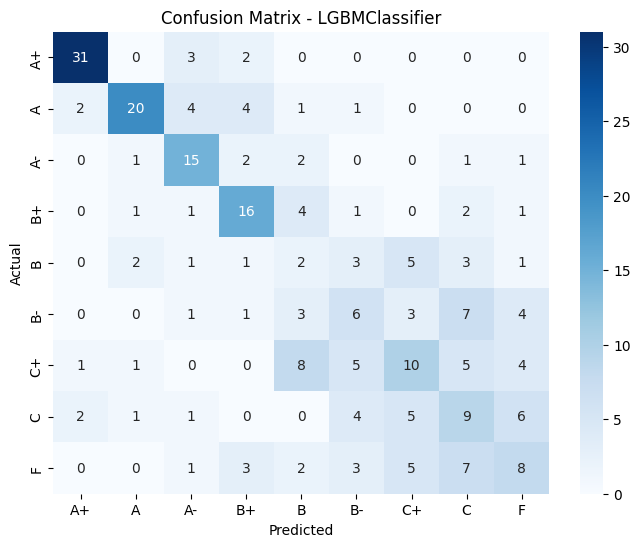

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
rf_estimator = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.4696


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-cybersecurity_9.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-cybersecurity_9.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [6 2 0 2 4]


# Parallel Processing

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT", "PARALLEL PROCESSING"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "PARALLEL PROCESSING"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'OBJECT-ORIENTED APPLICATION DEVELOPMENT',
       'DATABASE SYSTEM FUNDAMENTALS',
       'INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE',
       'PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS',
       'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(0.9253731343283582), np.int64(1): np.float64(0.9538461538461539), np.int64(2): np.float64(0.8435374149659864), np.int64(3): np.float64(0.9465648854961832), np.int64(4): np.float64(1.0420168067226891), np.int64(5): np.float64(1.1272727272727272), np.int64(6): np.float64(1.024793388429752), np.int64(7): np.float64(1.087719298245614), np.int64(8): np.float64(1.1272727272727272)}, 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 100}

Li

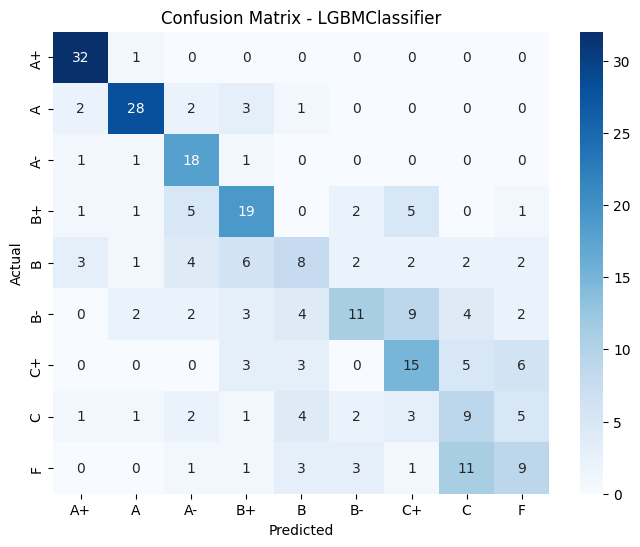

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.5184


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-parallel-processing_9.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-parallel-processing_9.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [8 0 3 6 6]


# Data Mining

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT", "DATA MINING"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "DATA MINING"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'OBJECT-ORIENTED APPLICATION DEVELOPMENT',
       'DATABASE SYSTEM FUNDAMENTALS',
       'INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE',
       'PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS',
       'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': 'balanced', 'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.5770

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        39
           1       0.76      0.86      0.81        36
           2       0.68      0.72      0.70        32
           3       0.71      0.63      0.67        38
           4       0.39      0.43      0.41        35
           5   

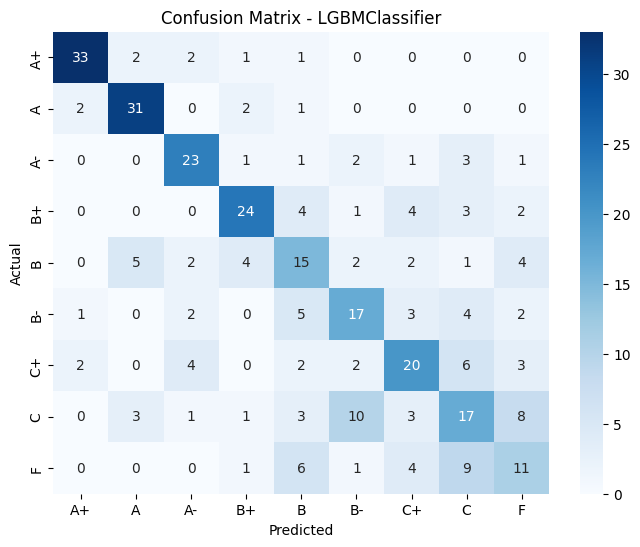

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.5754


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-dm_9.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-dm_9.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [7 4 6 0 3]


# TCP/IP Network Routing

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT", "TCP/IP NETWORK ROUTING"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "TCP/IP NETWORK ROUTING"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'OBJECT-ORIENTED APPLICATION DEVELOPMENT',
       'DATABASE SYSTEM FUNDAMENTALS',
       'INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE',
       'WEB APPLICATION DEVELOPMENT', 'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': 'balanced', 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.4913

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        32
           1       0.89      0.81      0.85        31
           2       0.61      0.57      0.59        40
           3       0.41      0.35      0.38        31
           4       0.19      0.24      0.21        25
           5       0.41      0.44      0.42   

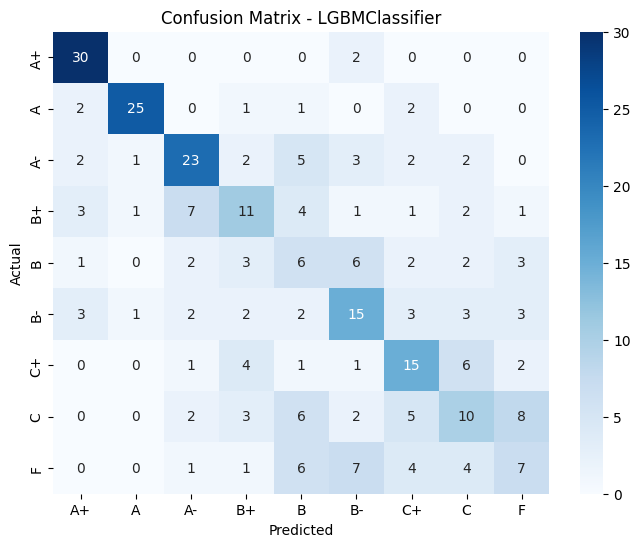

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.4864


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-tcpip-routing_9.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-tcpip-routing_9.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [6 7 0 8 0]


# Server Configuration and Management

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT", "SERVER CONFIGURATION AND MANAGEMENT"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "SERVER CONFIGURATION AND MANAGEMENT"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'OBJECT-ORIENTED APPLICATION DEVELOPMENT',
       'DATABASE SYSTEM FUNDAMENTALS',
       'INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE',
       'PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS',
       'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(0.9174603174603174), np.int64(1): np.float64(0.9444444444444444), np.int64(2): np.float64(0.9585406301824212), np.int64(3): np.float64(0.9045383411580594), np.int64(4): np.float64(1.0275555555555556), np.int64(5): np.float64(0.9730639730639731), np.int64(6): np.float64(1.061524334251607), np.int64(7): np.float64(1.1169082125603864), np.int64(8): np.float64(1.157157157157157)}, 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 100}

Li

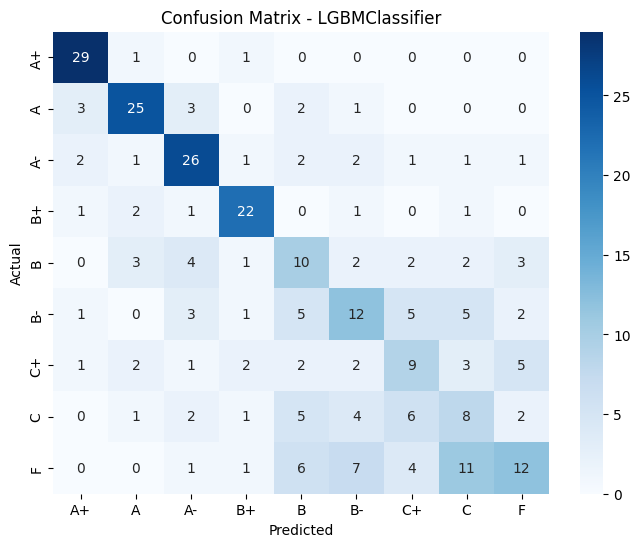

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.5207


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-scm_9.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-scm_9.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [6 6 0 3 0]


# TCP/IP Network Application Development

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT", "TCP/IP NETWORK APPLICATION DEVELOPMENT"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "TCP/IP NETWORK APPLICATION DEVELOPMENT"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'OBJECT-ORIENTED APPLICATION DEVELOPMENT',
       'DATABASE SYSTEM FUNDAMENTALS',
       'PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS',
       'SOFTWARE DESIGN', 'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': {np.int64(0): np.float64(0.9078189300411522), np.int64(1): np.float64(0.9355385920271416), np.int64(2): np.float64(0.9500430663221361), np.int64(3): np.float64(0.9883512544802867), np.int64(4): np.float64(1.114141414141414), np.int64(5): np.float64(1.1243628950050968), np.int64(6): np.float64(0.9500430663221361), np.int64(7): np.float64(1.0298786181139121), np.int64(8): np.float64(1.047483380816714)}, 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.4638

Classification R

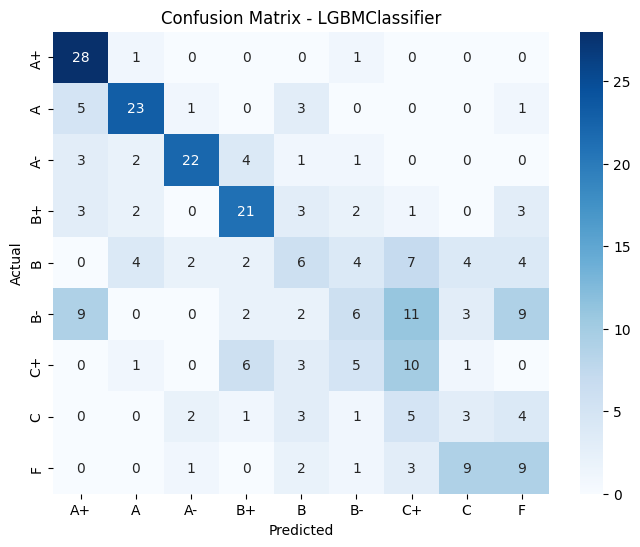

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.4474


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-network-application_9.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-network-application_9.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [1 1 4 5 0]


# Network Security Management

In [ ]:
columns = ['CGPA', 'Average Studying Hours per Week',
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT", "NETWORK SECURITY MANAGEMENT"]
df_filtered = df[columns]

# =====================
# Define Features & Target
# =====================
target_subject = "NETWORK SECURITY MANAGEMENT"

X = df_filtered.drop(columns=[target_subject])  # Features (all except AWAD grade)
y = df_filtered[target_subject]  # Target (AWAD grade)

# =====================
# Handle Imbalanced Data
# =====================
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# =====================
# Train Random Forest Model (with Hyperparameter Tuning)
# =====================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Selected Features via RFE:
 Index(['CGPA', 'Average Studying Hours per Week',
       'PROGRAMMING AND PROBLEM SOLVING', 'SOFTWARE AND REQUIREMENTS',
       'TCP/IP NETWORK FUNDAMENTALS',
       'PROBABILITY AND STATISTICS FOR COMPUTING',
       'OBJECT-ORIENTED APPLICATION DEVELOPMENT',
       'DATABASE SYSTEM FUNDAMENTALS', 'WEB APPLICATION DEVELOPMENT',
       'SOFTWARE PROJECT MANAGEMENT'],
      dtype='object')
Best Parameters: {'class_weight': 'balanced', 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 100}

LightGBM Test Accuracy: 0.4982

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.65      0.80      0.72        35
           2       0.62      0.54      0.58        39
           3       0.33      0.46      0.39        24
           4       0.21      0.14      0.17        36
           5       0.40      0.36      0.38        33
           6       0.

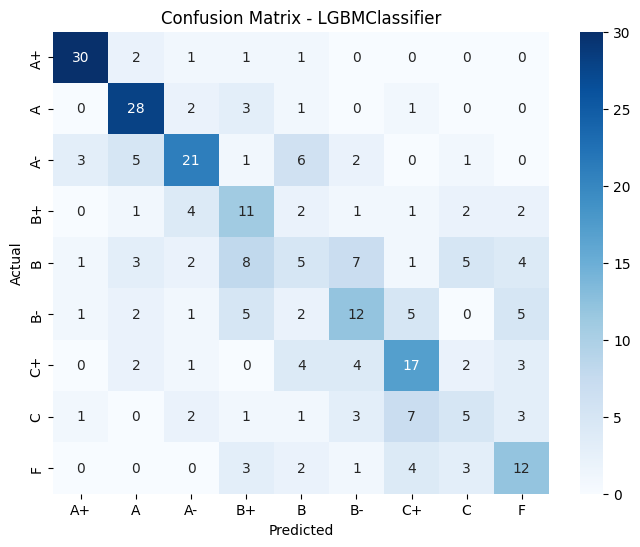

In [ ]:
# -------------------------
# (Optional) Standardize Features for RFE or model performance
# -------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# -------------------------
# Compute Class Weights based on training data
# -------------------------
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# -------------------------
# Feature Selection using RFE with a Random Forest (as the estimator)
# -------------------------
lgbm_estimator = LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.2,
    num_leaves=100,
    class_weight=class_weights_dict,
    random_state=42,
    verbose = -1
)
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train_scaled.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# -------------------------
# Fine-Tuning LightGBM via GridSearchCV
# -------------------------
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 30],
    'learning_rate': [0.2],
    'num_leaves': [100],
    'class_weight': [class_weights_dict, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------
# Evaluate the Fine-Tuned LightGBM Model
# -------------------------
y_pred = best_model.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_map.keys(), yticklabels=grade_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

In [ ]:
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.4875


In [ ]:
# Save the trained model
joblib.dump(best_model, "lgbm-network-security_9.pkl")

# Load the saved model
loaded_model = joblib.load("lgbm-network-security_9.pkl")
print("✅ Model loaded successfully!")

# Example: Make predictions on new data
new_data = X_test_rfe.iloc[:5]  # Replace with real new data
predictions = loaded_model.predict(new_data)

print("Predictions:", predictions)

✅ Model loaded successfully!
Predictions: [6 0 4 1 8]
